### Standard Lib Imports

In [1]:
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).parent)

In [2]:
from src import config
from src.helper import *

### Load Data

In [25]:
availability = read_data('availability.csv')
availability['date'] = pd.to_datetime(availability['date'])
availability = availability.fillna(0)

In [32]:
product_details = read_data('product details.csv')
product_details = product_details.rename({'product_id*31': 'product_id'}, axis=1)

In [28]:
availability.head()

,product_id,date,a1_available,a2_available,a3_available,a4_available
0,309672547,2020-01-02,0.0,1.0,0.0,0.0
1,333820462,2020-01-02,1.0,1.0,0.0,0.0
2,270239865,2020-01-02,0.0,1.0,1.0,0.0
3,330177900,2020-01-02,0.0,1.0,0.0,0.0
4,289099769,2020-01-02,0.0,1.0,0.0,0.0


In [33]:
product_details.head(3)

,product_id,manufacturer,main_category
0,283509384,Apple,Handy
1,241663414,Tamron,Kameras
2,103621251,ASUSTeKCOMPUTER,Tablets


### Analysis

**Q. What are the average availability rates across quality variants for the entire year?**

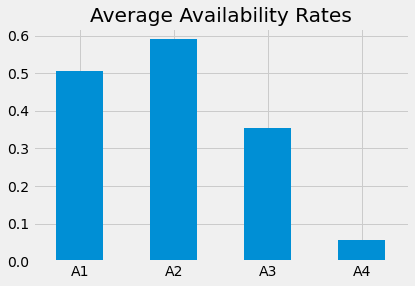

In [29]:
availability.drop(['product_id', 'date'], axis=1).mean().plot(kind='bar')
plt.title('Average Availability Rates')
plt.xticks(ticks=[0, 1, 2, 3], 
           labels=['A1', 'A2', 'A3', 'A4'], 
           rotation=0);

Some quick insights from above:
- Variant A2 is available the most, on average, across the year. (Available for ~60% of the day, on average)
- Variant A4 is available the least, on average, across the year. (Available for ~5% of the day, on average)

**Q. What are the most available products?**

In [30]:
availability['avg_availability'] = (availability['a1_available'] + availability['a2_available'] \
    + availability['a3_available'] + availability['a4_available'])/4

In [34]:
n = 10
top_n_products = availability.groupby('product_id')['avg_availability'].mean().sort_values(ascending=False).head(n).reset_index()

In [35]:
top_n_products.merge(product_details, on='product_id')

,product_id,avg_availability,manufacturer,main_category
0,327381421,0.896872,Samsung,Handy
1,319938910,0.875875,Samsung,Handy
2,328697836,0.856879,Samsung,Handy
3,338435928,0.856641,Samsung,Handy
4,332538023,0.837891,Apple,Handy
5,338435897,0.834656,Samsung,Handy
6,332538085,0.832304,Apple,Handy
7,328697867,0.828456,Samsung,Handy
8,328697929,0.828130,Samsung,Handy
9,338435959,0.825288,Samsung,Handy


**Q. What are the most available categories?**

In [38]:
n = 10
top_n_categories = availability.merge(product_details, on='product_id', how='left')
top_n_categories = top_n_categories.groupby('main_category')['avg_availability']\
    .mean().sort_values(ascending=False).head(n).reset_index()

In [39]:
top_n_categories

,main_category,avg_availability
0,Handy,0.438956
1,Tablets,0.373773
2,Konsolen,0.369784
3,Apple,0.363949
4,Kameras,0.351758
5,Laptop,0.333814
6,Wearables,0.328163
7,Audio & Hifi,0.313299


**Availability rates of different variants across the year**

In [62]:
plot_params = {'linewidth': config.lw, 'figsize': config.FIGSIZE}

In [70]:
a1_availability = availability.set_index('date')['a1_available'].resample('W').mean()
a2_availability = availability.set_index('date')['a2_available'].resample('W').mean()
a3_availability = availability.set_index('date')['a3_available'].resample('W').mean()
a4_availability = availability.set_index('date')['a4_available'].resample('W').mean()

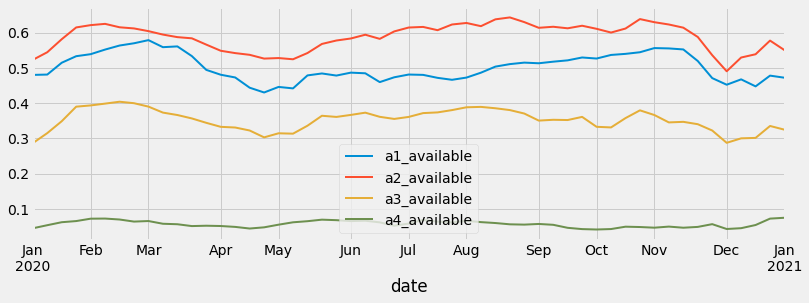

In [71]:
a1_availability.plot(**plot_params)
a2_availability.plot(**plot_params)
a3_availability.plot(**plot_params)
a4_availability.plot(**plot_params)
plt.legend();